# <img style="float: left; padding-right: 10px; width: 80px" src="https://raw.githubusercontent.com/trivikverma/researchgroup/master/static/media/resources/epa1316/TU_descriptor%20black.png"> EPA-1316 Introduction to *Urban* Data Science 


## Assignment 1: Data Collection and Wrangling

**TU Delft**<br>
**Q1 2020**<br>
**Instructor:** Trivik Verma <br>
**TAs:** Aarthi Meenakshi Sundaram, Jelle Egbers, Tess Kim, Lotte Lourens, Amir Ebrahimi Fard, Giulia Reggiani, Bramka Jafino <br>
**[Computational Urban Science & Policy Lab](https://research.trivikverma.com/)** <br>

---



## 1. Introduction

_Note:_ If you have not gone through **labs and homeworks 01-03**, kindly do so before starting this assignment, as those will help you with all the necessary knowledge for this assignment. This assignment will be useful for you when conducting your own statistical analysis as part of the final project for this course or in the future. 

Please submit the results by Brightspace under **Assignment 01**, using a zipped file **<firstname_lastname_01.zip>** as example,

```text
trivik_verma_01.ipynb

```

Please **do not** submit any data or files other than the jupyter notebook. We have the same data as you do.

This assignment is designed to support three different learning objectives. After completing this laboratory you will be able to:

* Explore variables in a dataset
* Manage missing data 
* Melt, pivot and reshape data to get it in a form useful for statistical analysis 

This assignment requires you to go through five tasks in cleaning your data. 

1. Reading and Summarizing the Data.
2. Subsetting the Data. This extracts just the part of the data you want to analyse. 
3. Manage Missing Data. Some data is not available for all objects of interest (rows) or all variables for every object (columns). 
4. Shape the Data. We need to convert the data into a suitable format for analysis. 
5. Saving the Results. The results are saved for future use.

## 2. Understanding Data Frames
This assignment puts together what you learned in **Weeks 1-3**. This spreadsheet type format may contain many different data types in the columns. In addition all data frames contain column names, which are strings, and row indices, which are integers. Of course it is very handy to bundle these various kinds of data together to do higher-level tasks, as you will display in this assignment. 


## 3. Download the Data

For this assignment we are going to use the World Development Indicators database as a source of data. The World Development Indicators is the primary data source for the World Bank, a financial institution that provides loans to developing nations for investment in national infrastructure. The database is comprised of data from officially recognized sources all over the world. The data consists of time series which in some cases dates back over fifty years. Nations are variously categorized into different groups in order to permit the comparative analysis of nations. 

You can download the data here as a csv file (It is intentional that I am not explicitly telling you where exactly you will find the csv file on this website):
http://data.worldbank.org/data-catalog/world-development-indicators

So after you unzip, we’ll work with the file ``WDIData.csv``, which is in a modified csv format. All the other files around it are informative and may be useful for you to do a better analyses. These extra files only provide more information on data sources of indicators used in the main file. Put the data in a convenient location on your computer or laptop, ideally in a folder called **data** which is next to this **jupyter notebook**. I recommend taking a look at the file in a text editor like _atom_ for any system or notepad++ for windows. These will also make your life easy for everything else on your computer. Make sure you’ve set your working directory in the correct manner – okay?

It’s a big file and it may take a while to load onto your laptop and into Python (running on the jupyter labs environment). 

The data is organized with one country and all the data for one indicator on each line. But there are many countries, and many indicators. Every indicator may have data reaching back from _1960_. These are all shown together on the same line. Because the data is replicated by country, the file is longer than it is wide. We call it “long” data. Thus, each country may be repeated on rows based on the indicator that is shown.

## 4. Subsetting the Data

From now on we want a much smaller subset of this data. We have all the valid country information using the country code information in ``WDICountry.csv`` or in one of the columns of the main data itself. (Note that it is best practice to search using country codes and not real country names. Countries are known by many names by many different people and languages.) In the future, World Bank may change the datasets with new country names as the data collection efforts of orgs is not relevant to geopolitics. Hence, it is important to work with codes as opposed to names to make our analyses more reproducible across time.

The file ``WDISeries.csv`` contains a description of all the indicator variables and their names. We won’t actually use this file in the analysis, but you will find it helpful in designing your own analysis. Your objectives for this assignment is to select **4-7 variables** for further exploratory statistics (more information later in exercises). 

For example, I can show you what I did, 

```text
My hypothesis
I’d like to examine world broadband access. For that reason I chose a broadband account variable. The data is organized by country. I want to control for the wealth, population, and land area of the country. I also have a hypothesis that more urban countries are more likely to have good broadband services. There are economies of scale when providing services to a large city. 

I hypothesize that larger countries have lesser access, since it is expensive to provide access over larger areas. On the contrary, countries with a lot of urban land area can take advantage of economies of scale resulting in relatively more broadband users concentrated in smaller zones within the country. We also hypothesize that wealthier countries have better broadband access, since there is a larger market to provide the newest services. A final variable which we add is rail lines. I hypothesize that broadband lines can take advantage of existing infrastructure right-of-ways, of which rail is a surrogate measure. Furthermore, the presence of rail lines may indicate other factors including a geography which is conclusive to physical development, and favourable institutional factors which promote high technology development. 

My choice of variables were, 

| Variable Name                 | Variable Code     |
| ----------------------------- | ----------------- |
| Fixed broadband subscriptions | IT.NET.BBND       |
| GDP (current US$)             | NY.GDP.MKTP.CD    |
| Population, total             | SP.POP.TOTL       |
| Land area (sq. km)            | AG.LND.TOTL.K2    |
| Urban land area (sq. km)      | AG.LND.TOTL.UR.K2 |
| Rail lines (total route-km)   | IS.RRS.TOTL.KM    |

```

Recall that the data is organized with countries and variables on the rows, and years on the column. Using this table as a guide, I can now extract only those rows which contain these variable names, and throw out the great many other variables that I will not need. You are expected to do the same further down in the exercise. 

For now let’s set aside the added complexity of time series and dynamics. Our task is to select just one year with a lot of data for most countries.

## 5. Manage Missing Data

There is a lot of missing data. If you make the year on which you search too recent, many countries have not been able to report their data. If you make the year too long ago, the practice of administrative data collection had not yet taken hold. Countries did not know that collecting data would be a good thing; furthermore they have yet to back-fill their records. 

Why is data not available or missing in this dataset?
The data availability for urbanisation is especially limited. The urbanisation variable in particular ``AG.LND.TOTL.UR.K2`` is only available per decade. The most recent populated data for this example variable is therefore 2010, in variable ``2010``.
It’s quite possible that the World Bank is constructing estimates of urbanisation out of complex data sources such as satellite imagery. Regardless, it appears expensive to compute, and is therefore only offered every decade. 

We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

In this assignment we are going to use a number of these strategies. We can certainly be dropping off cases (strategy one). I am loathe to drop off whole indicators. But we can, for example, choose a year for the indicator where most of the data is available (strategy three).

Building a separate model to impute missing data, is often a good idea. But that requires a first working model before we even consider building a missing data model (and we haven't got there yet in this course); the working model and the missing data model are often constructed together. Note also that there are packages in Python which will construct a model of your data, and then impute missing values for you. You may or may not find these functions and packaging for modelling your data to be fully appropriate. Therefore treat these missing data models very seriously, and not as a black box. Models of missing data are as important, and deserve just as much care and caution as any other statistical model.  

In the next section I discuss some specifics about how the data is currently formatted, and how we would like to have it formatted for analysis purposes. 


## 6. Reshape the Data

As you may have noticed from your outputs above, the data is still not  in a form which is suitable for statistical analysis. Every row is a a combination of a country, a few variables, and a year. We’d like each row instead to be a country, and for there to be many columns according to the variables involved. 

The data is stored with one country and one variable by year. That’s long data. We want to convert it so each row is a case, and that case is a country. Then each column can store the variables for that country. That’s wide data. Our objectives in this section is to convert from one format of the data to the other. For the purposes of this assignment we’re not going to handle time series data, even though the World Development Indicators data often has many years of time history collected for each of the nations. That's why I asked you to select a particular year only.

You might ask why the original data was even stored in this manner. The most efficient means of storing data is to store everything once and then not repeat it. So for instance each element of this data set might be a combination of a country, variable and year. Any additional information, like the full and official name of the country, could be stored in a supplementary table and consulted only at need. 

That’s the most efficient way. But every user and application is slightly different. As noted above, typically what we need for statistical analysis is a single case on each row, and a set of variables in the columns. Our case is a country, and our variables are things like GDP and population as described above in my example choice of variables. This involves some restructuring of the data which we clearly don’t want to do by hand. Pandas is your best friend here. 

Reshaping data is a two-step process of melting and pivoting the data. Melting the data involves describing which data are indicators ("id") and which are variables for retrieval (“measure”). In this case your data may already be in melted form (long form). Pivoting then involves actually reshaping the data into the needed format. In this step, you have to reshape the data from long to wide format.
 
Pivoting the data involves specifying what data is on the rows and on the columns. Hint: functions melt and pivot offered by ``numpy`` library in python. For our analyses we want “Country.Code” to be on the rows, and to have all 4-7 variables as columns, where the value of each cell is the value taken from the column year that you chose at the subsetting step.



## ``Exercise 1: Loading the data``

- Load the `WDIData.csv` file into Python
- Explore it by looking at first and last 5 rows
- Programattically find and print information on the data,
    - number of columns in the data
    - names of the columns in the data 
    - number of rows in the data (excluding the header names)
    - how many unique regions/countries in the data
    - how many unique national indicators in the data
    - anything else ...?
    
- **IMPORTANT** make sure your code can run independent of the machine. i.e. we will store the data in a folder called data and we will run your notebook next to it organised as follows,

```text
├── trivik_verma_01.ipynb
├── data
│   ├── WDIData.csv
```


## Author: Farley Nick Rimon
- **Introduction to Urban Data Science**
- **Assesment 1**
- **:) Always happy**

In [52]:
##Load WDIData.csv

#import necessary packages

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as snst
import pandas as pd
import numpy as np

#Open and read data from WDIData.csv
df_wdi = pd.read_csv("data/WDIData.csv", header= 0) #specify that the first row is the Header


In [54]:
#print shape, m x n, m is rows and n is column
shape_1 = df_wdi.shape #check shape of DataFrame

#after printing, you find out,IT IS A HUGE MATRIX! We will make it (part of it) tidy!
print("The shape of the DataFrame is (row x column) = ", shape_1 )

The shape of the DataFrame is (row x column) =  (379368, 65)


In [56]:
#print name of the first column
columns_1 = df_wdi.columns
print("The name of the columns and dtype are ", columns_1 )

The name of the columns and dtype are  Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')


In [58]:
#print amount of columns
columns_2 = len(df_wdi.columns)
print("Amount of columns = ", columns_2)

Amount of columns =  65


In [63]:
#show that it works as desired now, with correct headers
#we show the first 5 rows of the data
df_wdi.head()

#Notice there are a lot of NaNs!

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.27713,NaN,NaN,37.165211,NaN,NaN,NaN


In [64]:
#print number of rows that is the header
rows_1 = len(df_wdi.index)
print("The number of rows is" ,  rows_1)

The number of rows is 379368


In [65]:
#unique regions 
#group DataFrame by Country code
df_wdi_country =  df_wdi.groupby('Country Code').count()

#Determine length of WDI Country
country_1 = len(df_wdi_country.index)

#264 country codes!
print("The amount of country codes are", country_1)

The amount of country codes are 264


In [66]:
#unique national indicators

#unique regions 
#group DataFrame by Country code
df_wdi_indicator =  df_wdi.groupby('Indicator Code').count()

#Determine length of WDI Country
ind_1 = len(df_wdi_indicator.index)

#1437 Unique indicator codes!
print("The amount of unique indicators are", ind_1)

The amount of unique indicators are 1437


In [81]:
#Print country with least available data and most available data about an indicator code

#a sum of available data per country. Take into account that entries such as Country Name, Country Code, Indicator Code,Indicator Name are included. 
#However all rows have this, so it can be neglected from the negative comparison

count = df_wdi.notnull().sum(axis=1) #use notnull() and sum() function

#find the index (row) of the minimum available data
count_min = [count.idxmin(),count.min()]

#find the index(row) with most available data
#let us use the country with most available data using count_max!
count_max = [count.idxmax(),count.max()]
count_max #print count_max
print("The index with least data entries is at index", count_min[0], "and its amount of entries is", count_min[1], ". The country is", df_wdi.iloc[0,0])
print("The index with most data entries is at index", count_max[0], "and its amount of entries is", count_max[1], ". The country is", df_wdi.iloc[54,0])

#WOW, seems like Arab World provides information on certain topics more than others.




The index with least data entries is at index 0 and its amount of entries is 4 . The country is Arab World
The index with most data entries is at index 54 and its amount of entries is 64 . The country is Arab World


## ``Exercise 2: Subsetting the data``

- state your hypothesis in a markdown cell as I showed in the example above (there is no single right hypothesis, you are free to make a **reasonable** choice for this task)
- find the variables of interest for your hypothesis and mention them in the markdown cell (4-7 variables)
- your dataframe would have greatly reduced in size and looks neater, show us what it looks like now using head() or something similar
    - show some statistics like number or rows, columns, names of variables and unique countries etc.
- you’ll see that your data contains values for many years of data, or perhaps NA (“not applicable”), if the country has failed to report its findings. 
- For now let’s set aside the added complexity of time series and dynamics. Our task is to select just one year with a lot of data for most countries.
    - choose one year/column that you want to work with and drop the rest of the years. 

You can count the columns manually, but in a large data set like this it is accurate and convenient to let python calculate this for us. Get the index of relevant columns and store them in a variable. 

- when you do this for your own variables, you also will want to experiment to see which year you want to use. You might also choose to drop off some of your initial variable choices if they are poorly collected. 
- subset the data by creating a new dataframe only with ``your variables`` `[v1, v2, v3...]`

## HYPOTHESIS
I am interested in the energy industry of a country. Therefore, I am interested in the variables which specify the electric power production, electric power consumption, C02 emmissions and economic growth. The available data is organized by country (code). 

- I hypothesize that countries with highest relative economic growth are prone to have more CO2 emmissions. A relatively rapid economic growth, is characteristic for a country with emerging economy. Hence, developing towards a developed country. In order to reach this, many countries enter a phase, during which the manufacturing and industry sector become essential. An example countries in the secondary sector are Brazil, China, Russia, India, Indonesia, etc.

- Additionally, these countries will have a lower electric production percentage coming from renewable energy sources. A generalized conclusion: Countries in the secondary sector, are investing more in economic development. Therefore, investments in renewable energy to address climate change are less of a priority in the politic agenda. Although investments in renewable energy systems 

- I also hypothesize that countries with the highest population density, have a higher electric power consumption, since more people indicate a more developed area compared to rural, less densily populated area. A more developed country, usually has more citizens with electric devices. Thus, requiring a higher energy production.

Therefore I conclude that I will need the following variables:

My choice of variables were, 

| Variable Name                                                                | Series Code         |
| ---------------------------------------------------------------------------- | -----------------   |
| GDP growth (annual %)                                                        | NY.GDP.MKTP.KD.ZG   |
| Population density (people per sq. km of land area)                          | EN.POP.DNST         |
| Electric Power Consumption (kWh per capita)                                  | EG.USE.ELEC.KH.PC   |
| C02 Emmissions (metric Ton per capita)                                       | EN.ATM.CO2E.PC      |
| Renewable electricity output (% of total electricity output)                 | EG.ELC.RNEW.ZS      |

```
The connecting variable can be multiple. C02 emmissions are significantly accurate in making a relative conclusion about the primary sector of the country and an indicator of percentage of electric energy production coming from renewables.


NOTE: I have not read papers to make this conclusion. I assume it will not be correct. I am sorry for this.


In [82]:
#Data with a subset of information

#copy the column with Indicator Code to a separate variable
df_wdi_ind_code = df_wdi['Indicator Code']

#look for all rows that include the following Indicator codes
sub_df_wdi = df_wdi.loc[df_wdi_ind_code.isin(['EG.USE.ELEC.KH.PC', 'EN.ATM.CO2E.PC', 'EG.ELC.RNEW.ZS','EN.POP.DNST', 'NY.GDP.MKTP.KD.ZG'])]


In [83]:
##Uncomment and comment to print different characteristics

#subset of countries with all the indicator codes

sub_df_wdi.head() #check the new DataFrame with desired columns

#Notice it has greatly reduced in size!

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
193,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.607448,0.660638,0.724944,0.850567,0.969476,1.135271,...,4.572407,4.956928,4.801390,4.981330,4.933420,4.712845,NaN,NaN,NaN,NaN
347,Arab World,ARB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,2332.708771,2371.597009,2427.835381,2501.479664,NaN,NaN,NaN,NaN,NaN,NaN
470,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.816275,6.590121,3.184266,2.447410,3.173547,3.421765,1.137169,2.089837,1.47844,NaN
1049,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,NaN,8.430860,8.663154,8.903441,9.152526,9.410965,...,32.330122,33.067670,33.803785,34.533978,35.256897,35.968765,36.669804,37.372366,NaN,NaN
1171,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.549766,3.481219,3.770385,3.278073,2.920702,NaN,NaN,NaN,NaN,NaN


In [87]:

#print number of rows, that is the header
row_2 = len(sub_df_wdi.index)
print("Amount of rows = ", row_2)

#it has reduced!

Amount of rows =  1320


In [89]:

# #unique regions 
# #group DataFrame by Country code
sub_df_wdi_country =  sub_df_wdi.groupby('Country Code').count()

# # #Determine length of WDI Country
index_3 = len(sub_df_wdi_country.index)

print("Amount of country codes = ", index_3 )

#did not change!

Amount of country codes =  264


In [90]:

# #unique national indicators

# #unique regions 
# #group DataFrame by Country code
sub_df_wdi_indicator =  sub_df_wdi.groupby('Indicator Code').count()

# #Determine length of WDI Country
ind_2 = len(sub_df_wdi_country.index)
print("Amount of country codes = ", ind_2)

#did not change!

Amount of country codes =  264


In [118]:
#unique countries
sub_df_wdi_countries = sub_df_wdi['Country Name']

countries_count = sub_df_wdi_countries.unique()
 
print("A list of unique countries in the DataFrame:" , countries_count)

sub_df_wdi_countries_2 = sub_df_wdi.groupby('Country Name').count()
len_4 = len(sub_df_wdi_countries_2.index)

#print amount of unique countries
print("The amount of unique countries are", len_4)

A list of unique countries in the DataFrame: ['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & North Africa (IDA & IBRD countries)' 'Middle incom

In [91]:
#Print country with most available data

#a sum of available data per country. Take into account that entries such as Country Name, Country Code, Indicator Code,Indicator Name are included. 
#However all rows have this, so it can be neglected from the negative comparison
sub_df_wdi_years = sub_df_wdi.iloc[:,4:]
count = sub_df_wdi_years.notnull().sum(axis=0)


#find the index(row) with most available data
#let us use the country with most available data using count_max!
count_max = [count.idxmax(),count.max()]
count_max #print count_max

#2012 has the most available data
print("The year with most available data is",  count_max[0], "with" , count_max[1], "entries")

The year with most available data is 2012 with 1208 entries


In [13]:
#choose one year/column that you want to work with and drop the rest of the years. That year is 2012
#subset this data of 2012
sub_df_wdi_2012 = sub_df_wdi[['Country Name', 'Country Code','Indicator Name', 'Indicator Code','2012']]


sub_df_wdi_2012

,Country Name,Country Code,Indicator Name,Indicator Code,2012
193,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.956928
347,Arab World,ARB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2371.597009
470,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.590121
1049,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,33.067670
1171,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,3.481219
...,...,...,...,...,...
378124,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.600303
378278,Zimbabwe,ZWE,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,608.762505
378401,Zimbabwe,ZWE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,16.665429
378980,Zimbabwe,ZWE,Population density (people per sq. km of land ...,EN.POP.DNST,33.902368


## ``Exercise 3: Manage Missing Data``

We’ve got a number of ways in general of dealing with missing data. These involve

1. Dropping off cases (or rows) in the data with any missing variables
2. Excluding variables in the data with any missing data 
3. Selectively choosing indicators with only a limited amount of missing data
4. Replacing missing variables with averages, or other representative values
5. Creating a separate model to predict missing data

- Count the missing values in each column
- Manage the missing values (delete or replace values or leave them as they are) and briefly explain your choice for each column using comments or markdown text


In [14]:
#will print the count of missing values for each column

count = sub_df_wdi_2012.isnull().sum(axis=0) #count per column NaN using .isnull() function and .sum

#print the count for each column of data
#we find that 2012 has 190 NaN
print(count)

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
2012              112
dtype: int64


In [109]:
#With known columns with NaN, delete the rows with NaN, using .dropna(), since each code represent something different, it will be hard to make a nice replacement with .fillna()

sub_df_wdi_2012_clean = sub_df_wdi_2012.dropna()  

#check now for NaN

#will print the count of missing values for each column

count = sub_df_wdi_2012_clean.isnull().sum(axis=0) #count per column NaN using .isnull() function and .sum

#print the count for each column
#check that now there are no NaN anymore
print(count)
print("We dropped all the NaN values. It is clean now!")        
#succesful

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2012              0
dtype: int64
We dropped all the NaN values. It is clean now!


## ``Exercise 4: Reshape the data``

- Examine the dimensions of the new pivoted data that you have created. Show it to us using head or print commands.
- Then rename all column names to sometyhing better and useful, by replacing codes with their names or shorthand names (ex. AG.LND.TOTL.UR.K2 ---> Urban Land Area).  
- Sort the data by putting higher values for one indicator of your choice go first. If there are overlapping values, try to put chronological countries go first.

In [16]:
#pivot the data to make it tidy

#multi-index country name and country code and indicator codes as columns, making the data tidy. Each entry in column is a new attribute.
tidy_sub_df_wdi_2012_clean = sub_df_wdi_2012_clean.pivot(index = ['Country Name', 'Country Code'] , columns = 'Indicator Code', values = '2012')

tidy_sub_df_wdi_2012_clean = tidy_sub_df_wdi_2012_clean.dropna()  #remove new NaNs
tidy_sub_df_wdi_2012_clean = tidy_sub_df_wdi_2012_clean.reset_index() 
tidy_sub_df_wdi_2012_clean.head() #print the first 5 rows

Indicator Code,Country Name,Country Code,EG.ELC.RNEW.ZS,EG.USE.ELEC.KH.PC,EN.ATM.CO2E.PC,EN.POP.DNST,NY.GDP.MKTP.KD.ZG
0,Albania,ALB,100.000000,2118.327776,1.697966,105.854051,1.417526
1,Algeria,DZA,1.083680,1237.966507,3.477108,15.696040,3.400000
2,Angola,AGO,60.799484,219.253430,1.361181,20.139513,8.542147
3,Arab World,ARB,3.481219,2371.597009,4.956928,33.067670,6.590121
4,Argentina,ARG,29.261135,3000.603523,4.625260,15.249543,-1.026420


In [17]:
#print different characteristics

#subset of countries with all the indicator codes

sub_df_wdi_2012_clean.head() #check the new DataFrame with desired columns

#Notice it has greatly reduced in size!


,Country Name,Country Code,Indicator Name,Indicator Code,2012
193,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.956928
347,Arab World,ARB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,2371.597009
470,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.590121
1049,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,33.067670
1171,Arab World,ARB,Renewable electricity output (% of total elect...,EG.ELC.RNEW.ZS,3.481219


In [110]:
#print number of rows, that is the header
len_1 = len(tidy_sub_df_wdi_2012_clean.index)
print("Amount of rows now = ", len_1)

Amount of rows now =  178


In [113]:
# #unique regions 
#group DataFrame by Country code

tidy_sub_df_wdi_country_2012 =  tidy_sub_df_wdi_2012_clean.groupby('Country Code').count()
# #Determine length of WDI Country
len_2  = len(tidy_sub_df_wdi_country_2012.index)
print("Amount of country codes = ", len_2)
print("Amount of countries  = ", len_2)

#it has reduced, from 264 to 178

Amount of country codes =  178
Amount of countries  =  178


In [119]:

# #unique national indicators

# #unique regions 
#group DataFrame by Indicator code
tidy_sub_df_wdi_indicator =  sub_df_wdi_2012_clean.groupby('Indicator Code').count()

#Determine length of WDI Country
len_3 = len(tidy_sub_df_wdi_indicator.index)
print("Amount of Indicator codes = ", len_3)

#this is all we wanted! 5 indicator codes

Amount of Indicator codes =  5


In [26]:
#rename the indicator codes

tidy_sub_df_wdi_2012_clean = tidy_sub_df_wdi_2012_clean.rename(columns={'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)', 'EG.ELC.RNEW.ZS': 'Renewable electricity output (% of total electricity output) ' ,'EN.POP.DNST': 'Population density (people per sq. km of land area)', 'EG.USE.ELEC.KH.PC' : 'Electric Power Consumption (kWh per capita)', 'EN.ATM.CO2E.PC' : 'C02 Emmissions (metric Ton per capita)' ,'EG.ELC.RNEW.ZS' : 'Renewable electricity output (% of total electricity output)'})
tidy_sub_df_wdi_2012_clean #print new DataFrame renamed


Indicator Code,Country Name,Country Code,Renewable electricity output (% of total electricity output),Electric Power Consumption (kWh per capita),C02 Emmissions (metric Ton per capita),Population density (people per sq. km of land area),GDP growth (annual %)
0,Albania,ALB,100.000000,2118.327776,1.697966,105.854051,1.417526
1,Algeria,DZA,1.083680,1237.966507,3.477108,15.696040,3.400000
2,Angola,AGO,60.799484,219.253430,1.361181,20.139513,8.542147
3,Arab World,ARB,3.481219,2371.597009,4.956928,33.067670,6.590121
4,Argentina,ARG,29.261135,3000.603523,4.625260,15.249543,-1.026420
...,...,...,...,...,...,...,...
173,Vietnam,VNM,45.019219,1206.302894,1.588282,289.620044,5.247367
174,World,WLD,20.901536,3050.432295,5.005938,55.641202,2.516963
175,"Yemen, Rep.",YEM,0.000000,193.804009,0.764021,46.353350,2.392886
176,Zambia,ZMB,99.854463,733.211979,0.254267,19.458321,7.597593


In [125]:
#sort values by descending order of CO2 emissions and as second sorted criteria by alphabetical order of Country Name
tidy_sub_df_wdi_2012_clean_c02 = tidy_sub_df_wdi_2012_clean.sort_values(by =['C02 Emmissions (metric Ton per capita)', 'Country Name'], ascending= False)

#check value
tidy_sub_df_wdi_2012_clean_c02.reset_index()

#print your new data frame
tidy_sub_df_wdi_2012_clean_c02


#Qatar seems like a weird outlier, but for both Curacao & Trinidad & Tobago it seems to support the hypothesis 1 and 2. Of course more research shall be put in the why and how of this entire data analysis.

Indicator Code,Country Name,Country Code,Renewable electricity output (% of total electricity output),Electric Power Consumption (kWh per capita),C02 Emmissions (metric Ton per capita),Population density (people per sq. km of land area),GDP growth (annual %)
137,Qatar,QAT,0.000000,14853.324615,42.860375,189.153661,4.687259
34,Curacao,CUW,3.489640,5062.858345,39.445663,342.540541,-0.138917
161,Trinidad and Tobago,TTO,0.000000,6612.795644,33.773712,262.147563,1.269964
88,Kuwait,KWT,0.000000,16053.854857,30.015094,187.926655,6.625818
18,Brunei Darussalam,BRN,0.050891,9240.856264,24.226763,75.709488,0.912842
...,...,...,...,...,...,...,...
158,Tanzania,TZA,32.188227,97.805682,0.202863,53.118628,4.500154
114,Mozambique,MOZ,99.861532,459.967096,0.125514,31.616582,7.258439
121,Niger,NER,0.000000,49.339173,0.099118,14.048465,10.599907
47,Ethiopia,ETH,99.841939,57.210970,0.091866,92.726971,8.647812


In [47]:
#use function to find correlation between each of the attributes
#Pearson correlation method is used. This is the standard
tidy_sub_df_wdi_2012_clean_c02.corr()


Indicator Code,Renewable electricity output (% of total electricity output),Electric Power Consumption (kWh per capita),C02 Emmissions (metric Ton per capita),Population density (people per sq. km of land area),GDP growth (annual %)
Indicator Code,,,,,
Renewable electricity output (% of total electricity output),1.000000,0.000938,-0.401571,-0.170319,-0.029818
Electric Power Consumption (kWh per capita),0.000938,1.000000,0.512713,0.087209,-0.129673
C02 Emmissions (metric Ton per capita),-0.401571,0.512713,1.000000,0.068900,-0.039687
Population density (people per sq. km of land area),-0.170319,0.087209,0.068900,1.000000,-0.026157
GDP growth (annual %),-0.029818,-0.129673,-0.039687,-0.026157,1.000000


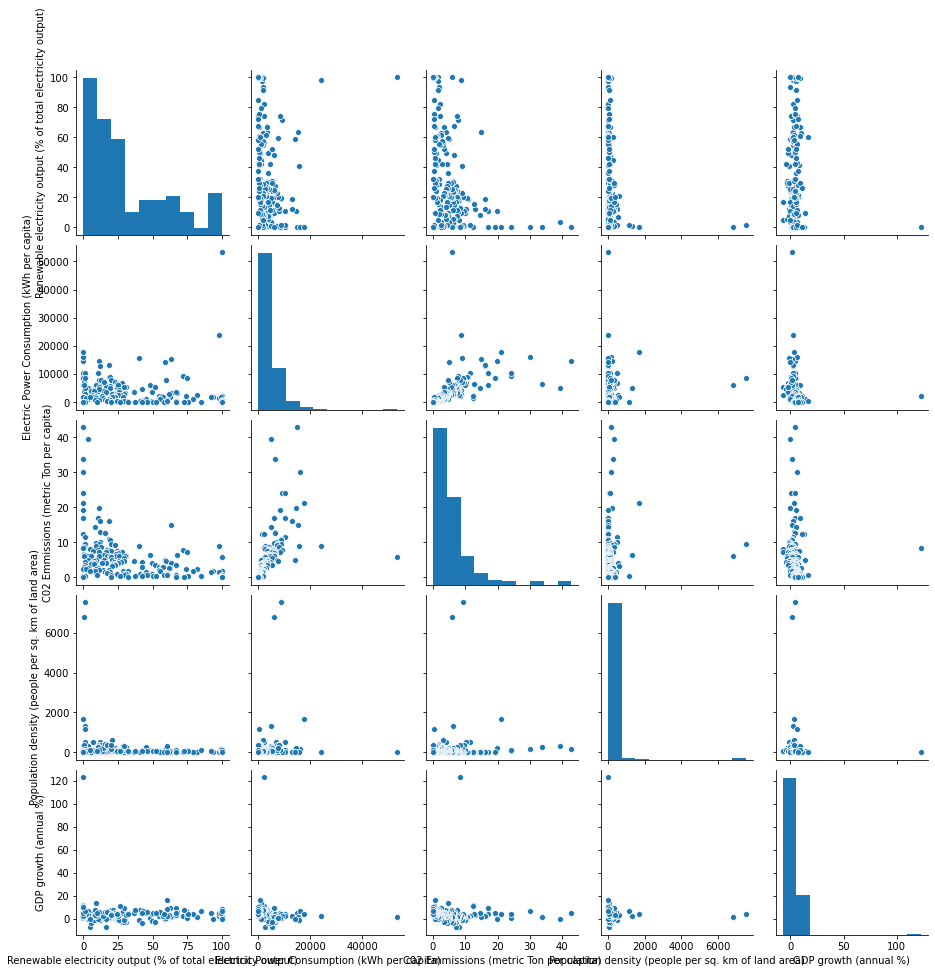

<Figure size 5040x5040 with 0 Axes>

In [123]:
##Plot correlation graph
snst.pairplot(tidy_sub_df_wdi_2012_clean_c02)
#make graph BIGGER
plt.figure(figsize=(70,70))
plt.show()
#sadly you cannot see a perfect correlation. To develop a better hypothesis, these plots shall be analysed to improve it.

## ``Exercise 5: Saving the results``
- Save the cleaned dataframe as 'assignment-01-cleaned.csv' in data folder

In [126]:
#save data
tidy_sub_df_wdi_2012_clean_c02.to_csv('assignment-01-cleaned.csv')